In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 005380.KS.csv to 005380.KS (1).csv


In [ ]:
import io
import pandas as pd
import numpy as np

df = pd.read_csv(io.BytesIO(uploaded['005380.KS.csv']))

In [ ]:
res=df

In [ ]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1592,2022-07-01,181500.0,185000.0,179500.0,180000.0,180000.0,916020
1593,2022-07-04,181000.0,183000.0,175000.0,178000.0,178000.0,1006440
1594,2022-07-05,180000.0,181000.0,173500.0,177500.0,177500.0,1097504
1595,2022-07-06,176000.0,177000.0,172000.0,172500.0,172500.0,924184
1596,2022-07-07,175000.0,177000.0,172500.0,175000.0,175000.0,533982


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1597.000000,1597.000000,1597.000000,1597.000000,1597.000000,1.597000e+03
mean,154361.803381,156421.102066,152374.264245,154366.812774,143827.349180,8.989269e+05
std,37613.526153,38051.674393,37076.101817,37466.861725,39961.011583,1.035901e+06
min,67200.000000,71000.000000,65000.000000,65900.000000,63380.367188,0.000000e+00
25%,128500.000000,130000.000000,127000.000000,128500.000000,116526.539063,4.247380e+05
50%,144500.000000,146500.000000,143500.000000,144500.000000,128395.742188,5.945770e+05
75%,175000.000000,178000.000000,173000.000000,175500.000000,172156.078125,9.492470e+05
max,271000.000000,289000.000000,259500.000000,267500.000000,261410.781250,1.993370e+07


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)
import numpy as np

from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [ ]:
df['Date']=pd.to_datetime(df['Date'],infer_datetime_format=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1597 non-null   datetime64[ns]
 1   Open       1597 non-null   float64       
 2   High       1597 non-null   float64       
 3   Low        1597 non-null   float64       
 4   Close      1597 non-null   float64       
 5   Adj Close  1597 non-null   float64       
 6   Volume     1597 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 87.5 KB


In [ ]:
df=df.set_index('Date')

In [ ]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,147500.0,148000.0,143500.0,144000.0,122929.078125,445332
2016-01-05,143000.0,145000.0,142000.0,143500.0,122502.265625,530496
2016-01-06,144000.0,145000.0,139000.0,140000.0,119514.414063,769406
2016-01-07,138500.0,140000.0,137500.0,137500.0,117380.226563,586187
2016-01-08,134500.0,138000.0,133500.0,136500.0,116526.539063,888701


In [ ]:
df=df.resample('M').mean()
df=df.fillna(df.mean())

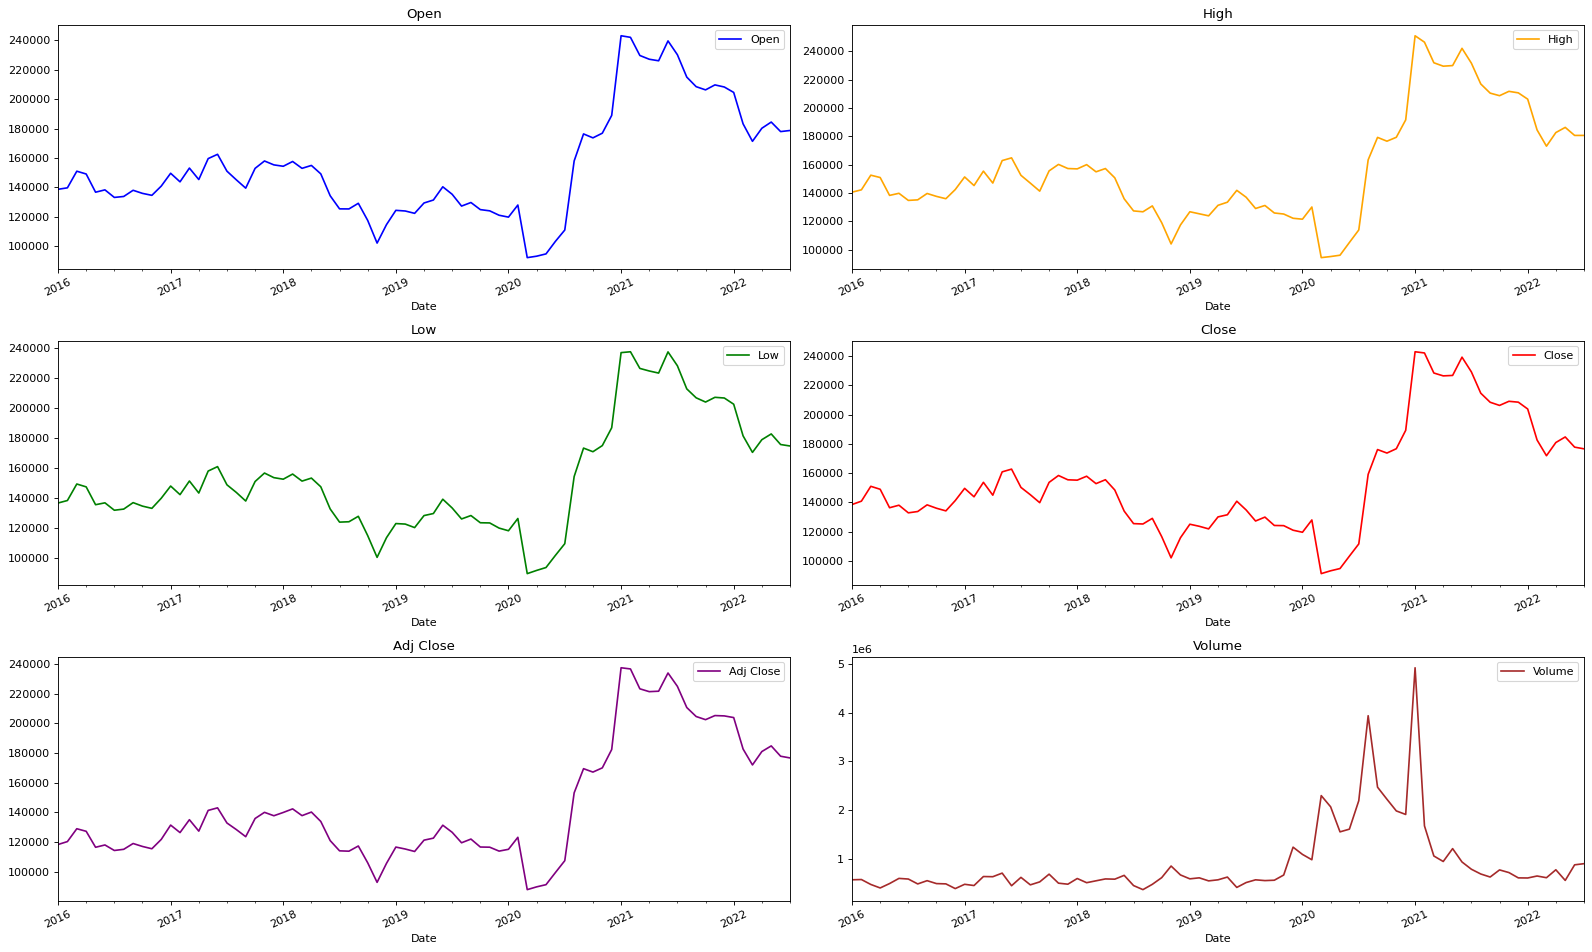

In [ ]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]


def Visualize(data):
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(20,feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(df)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    # moving_avg = ts_log.rolling(12).mean()
    # rolmean=timeseries.rolling(12).mean()
    # # rolmean=timeseries.rolling(12).mean()
    # # rolmean = pd.rolling_mean(timeseries, window=12)
    # rolstd = pd.rolling_std(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()

    rolstd = pd.Series(timeseries).rolling(window=12).std() 

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

THE COLUMN IS : Open


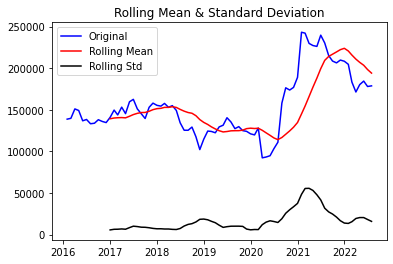

Results of Dickey-Fuller Test:
Test Statistic                 -2.330036
p-value                         0.162464
#Lags Used                      5.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


THE COLUMN IS : High


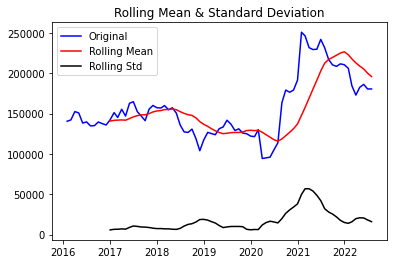

Results of Dickey-Fuller Test:
Test Statistic                 -2.318914
p-value                         0.165940
#Lags Used                      5.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


THE COLUMN IS : Low


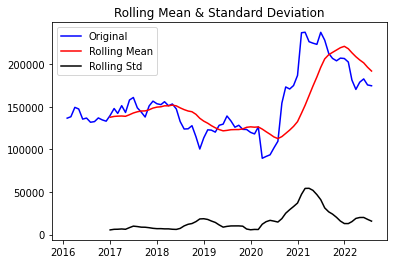

Results of Dickey-Fuller Test:
Test Statistic                 -2.368870
p-value                         0.150716
#Lags Used                      5.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


THE COLUMN IS : Close


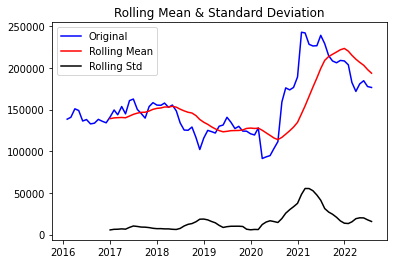

Results of Dickey-Fuller Test:
Test Statistic                 -2.351480
p-value                         0.155901
#Lags Used                      5.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


THE COLUMN IS : Adj Close


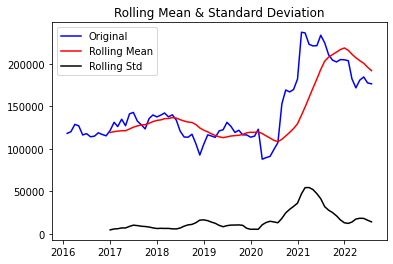

Results of Dickey-Fuller Test:
Test Statistic                 -2.064191
p-value                         0.259155
#Lags Used                      5.000000
Number of Observations Used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


THE COLUMN IS : Volume


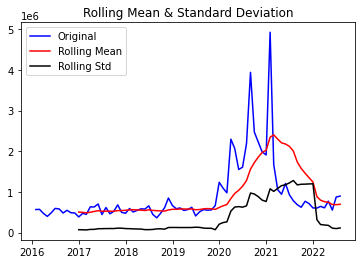

Results of Dickey-Fuller Test:
Test Statistic                 -2.463411
p-value                         0.124633
#Lags Used                      7.000000
Number of Observations Used    71.000000
Critical Value (1%)            -3.526005
Critical Value (5%)            -2.903200
Critical Value (10%)           -2.588995
dtype: float64




In [ ]:
for i in df:
  print("THE COLUMN IS : "+i)
  test_stationarity(df[i])
  print("\n")

THE COLUMN IS :Open


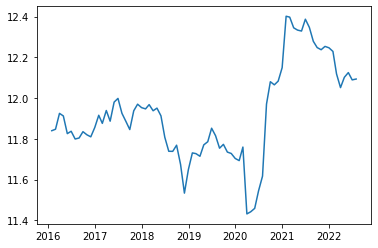

THE COLUMN IS :High


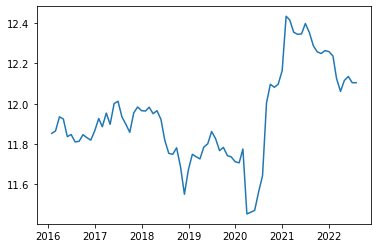

THE COLUMN IS :Low


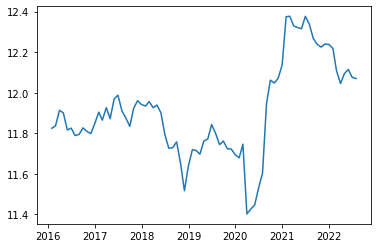

THE COLUMN IS :Close


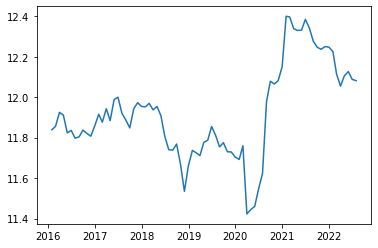

THE COLUMN IS :Adj Close


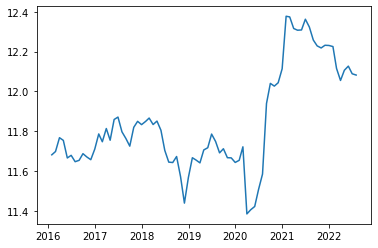

THE COLUMN IS :Volume


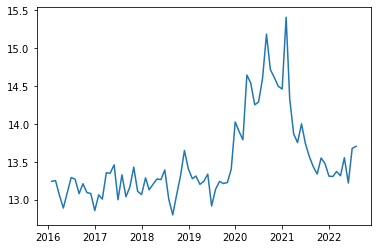

In [ ]:
for i in df:
  print("THE COLUMN IS :"+i)
  ts_log = np.log(df[i])
  plt.plot(ts_log)
  plt.show()

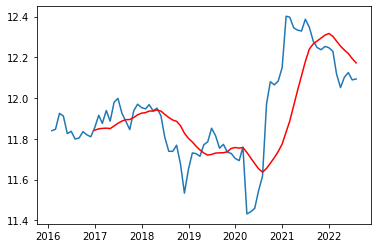

In [ ]:
ts_log = np.log(df['Open'])
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')


In [ ]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2016-01-31         NaN
2016-02-29         NaN
2016-03-31         NaN
2016-04-30         NaN
2016-05-31         NaN
2016-06-30         NaN
2016-07-31         NaN
2016-08-31         NaN
2016-09-30         NaN
2016-10-31         NaN
2016-11-30         NaN
2016-12-31    0.013005
Freq: M, Name: Open, dtype: float64

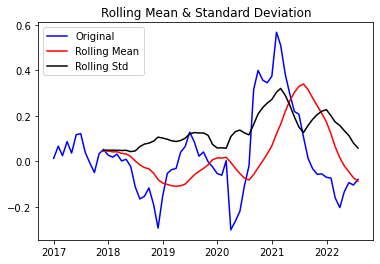

Results of Dickey-Fuller Test:
Test Statistic                 -2.348715
p-value                         0.156737
#Lags Used                      1.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


In [ ]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

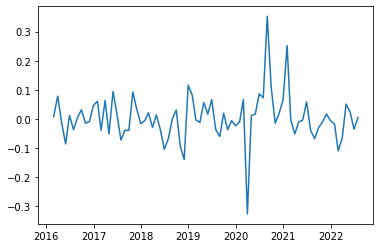

In [ ]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

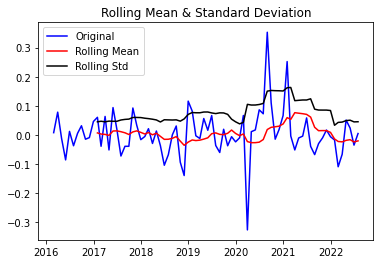

Results of Dickey-Fuller Test:
Test Statistic                -7.472947e+00
p-value                        4.999000e-11
#Lags Used                     0.000000e+00
Number of Observations Used    7.700000e+01
Critical Value (1%)           -3.518281e+00
Critical Value (5%)           -2.899878e+00
Critical Value (10%)          -2.587223e+00
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
ts_log.tail(5)

Date
2022-03-31    12.051366
2022-04-30    12.101902
2022-05-31    12.124998
2022-06-30    12.089258
2022-07-31    12.093464
Freq: M, Name: Open, dtype: float64

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Autocorrelation Function')

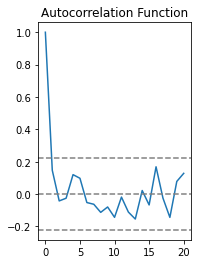

In [ ]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

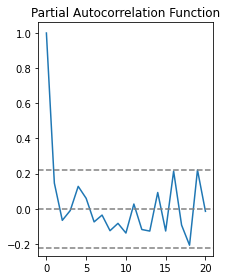

In [ ]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS: 0.4936')

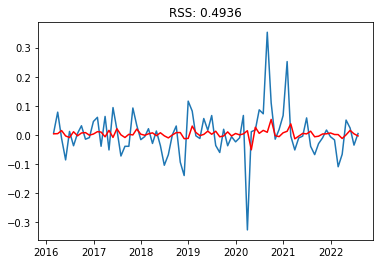

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 0.4942')

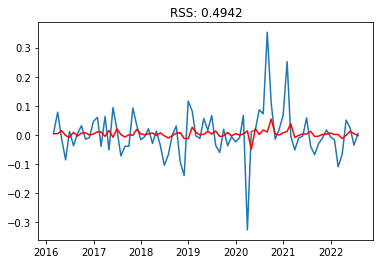

In [ ]:
model = ARIMA(ts_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

Text(0.5, 1.0, 'RSS: 0.4779')

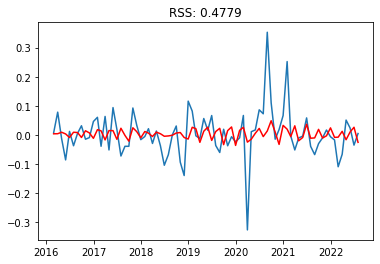

In [ ]:
model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2016-02-29    0.003280
2016-03-31    0.003561
2016-04-30    0.008677
2016-05-31    0.002827
2016-06-30   -0.009491
Freq: M, dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2016-02-29    0.003280
2016-03-31    0.006841
2016-04-30    0.015518
2016-05-31    0.018346
2016-06-30    0.008855
Freq: M, dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2016-01-31    11.840069
2016-02-29    11.843349
2016-03-31    11.846909
2016-04-30    11.855587
2016-05-31    11.858414
Freq: M, dtype: float64

Text(0.5, 1.0, 'RMSE: 29780.5148')

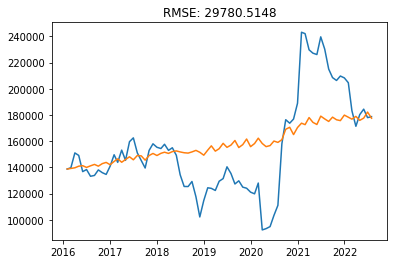

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
ts=df['Open']
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

In [ ]:
check=pd.DataFrame()
check["test"]=ts
check["Pred"]=predictions_ARIMA
check.head(5)

,test,Pred
Date,,
2016-01-31,138700.000000,138700.000000
2016-02-29,139694.444444,139155.715251
2016-03-31,151000.000000,139652.081010
2016-04-30,149100.000000,140869.168123
2016-05-31,136725.000000,141268.018707


In [ ]:
y_test=check['test']
y_pred=check['Pred']

In [ ]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 22173.686726388816


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 886879062.82901


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 29780.514818065352


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

0.347867373582056
